In [1]:
import numpy as np
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('./avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.groupby('type').mean()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [7]:
df = df.loc[(df.type == 'conventional') & (df.region == 'TotalUS')]
df['Date'] = pd.to_datetime(df['Date'])
data = df[['Date', 'AveragePrice']].reset_index(drop=True)
data = data.rename(columns = {'Date' : 'ds', 'AveragePrice' : 'y'})
data.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


<AxesSubplot:xlabel='ds'>

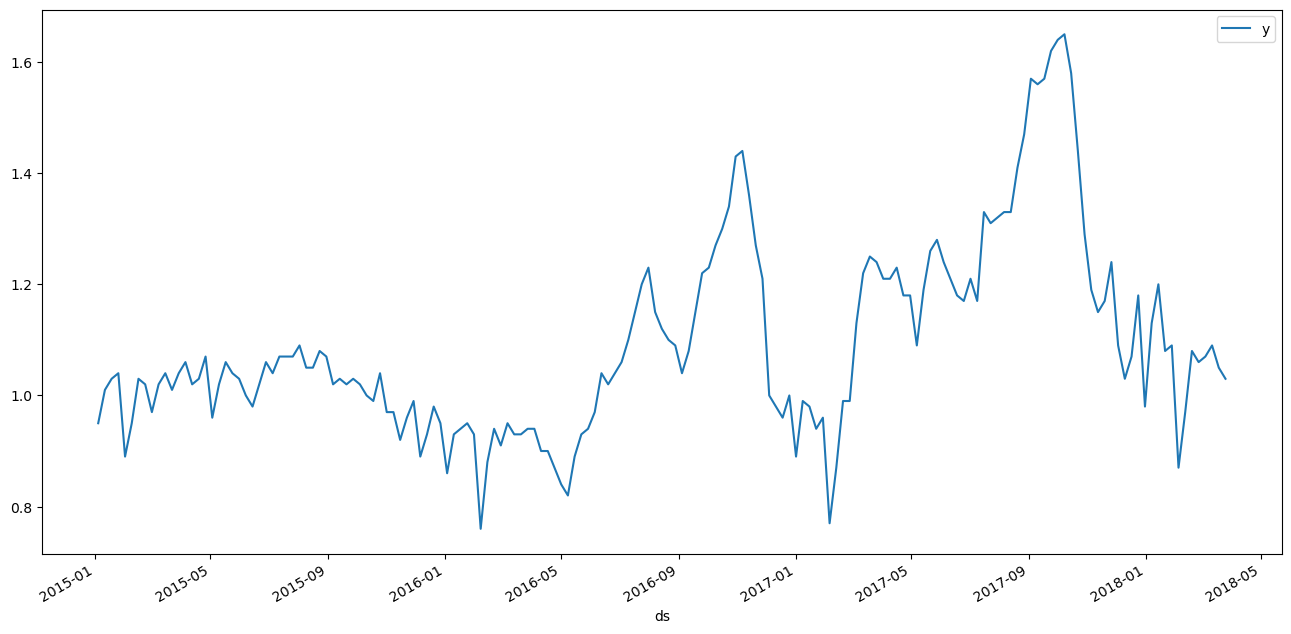

In [8]:
data.plot(x = 'ds', y='y', figsize= (16,8))

In [10]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast.tail()

10:19:46 - cmdstanpy - INFO - Chain [1] start processing
10:19:47 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.173767,0.998578,1.250235,1.112011,1.236820,-0.059997,-0.059997,-0.059997,-0.059997,-0.059997,-0.059997,0.0,0.0,0.0,1.113769
530,2019-03-22,1.173658,0.990550,1.245433,1.111528,1.236776,-0.058587,-0.058587,-0.058587,-0.058587,-0.058587,-0.058587,0.0,0.0,0.0,1.115071
531,2019-03-23,1.173550,0.982130,1.244539,1.111176,1.236811,-0.056703,-0.056703,-0.056703,-0.056703,-0.056703,-0.056703,0.0,0.0,0.0,1.116847
532,2019-03-24,1.173442,0.994312,1.252815,1.110622,1.236949,-0.054360,-0.054360,-0.054360,-0.054360,-0.054360,-0.054360,0.0,0.0,0.0,1.119082
533,2019-03-25,1.173333,0.997646,1.256291,1.110068,1.236924,-0.051589,-0.051589,-0.051589,-0.051589,-0.051589,-0.051589,0.0,0.0,0.0,1.121745


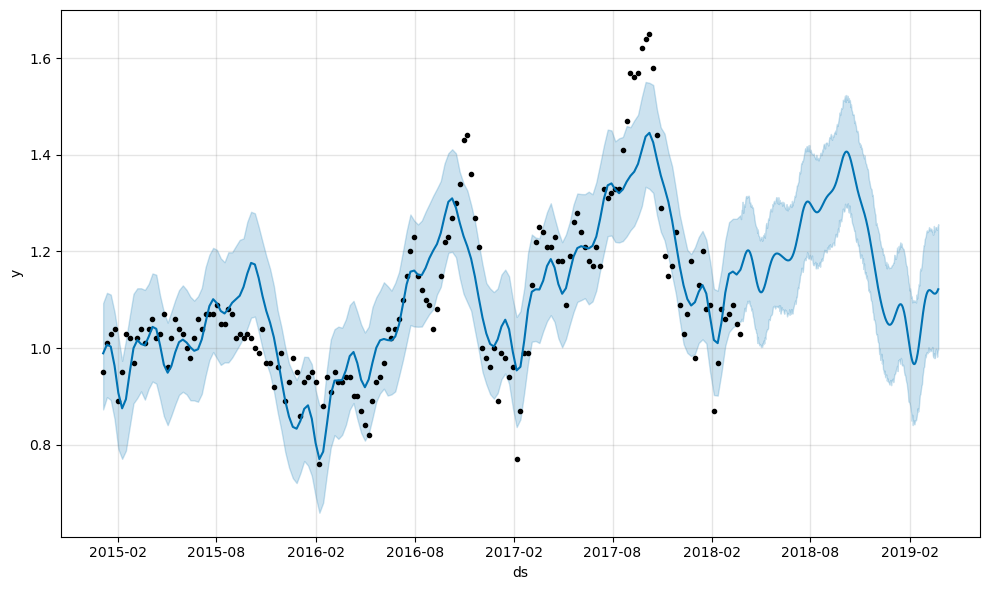

In [11]:
fig1 = model.plot(forecast)

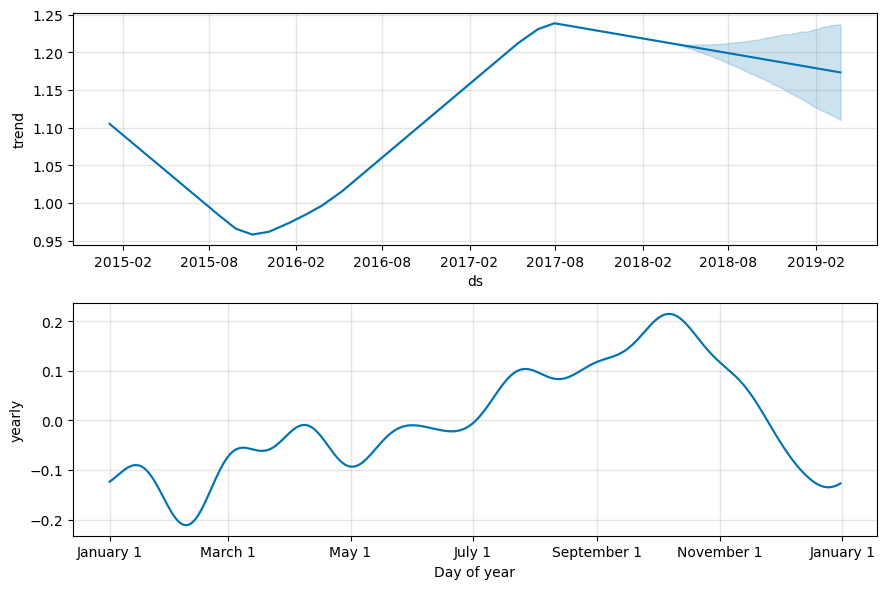

In [12]:
fig2 = model.plot_components(forecast)